<h1>Exoplanet Exploration</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

<h2><b>Goal for Exoplanet Exploration EDA</b></h2>
Our main goal is to analyze and understand the properties of discovered exoplanets to uncover patterns related to:

Habitability – What makes an exoplanet potentially habitable?\
Planetary Characteristics – How do size, mass, and orbit affect exoplanets?\
Discovery Methods – How have scientists detected exoplanets over time?


In [2]:
pd.set_option("display.max_rows", 20)

In [3]:
exoplanet_file = "exoplanets.csv"

In [4]:
df = pd.read_csv(exoplanet_file)

In [5]:
df.shape

(5834, 84)

In [6]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [7]:
#Column, data type and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5834 non-null   object 
 1   hostname         5834 non-null   object 
 2   sy_snum          5834 non-null   int64  
 3   sy_pnum          5834 non-null   int64  
 4   discoverymethod  5834 non-null   object 
 5   disc_year        5834 non-null   int64  
 6   disc_facility    5834 non-null   object 
 7   pl_controv_flag  5834 non-null   int64  
 8   pl_orbper        5548 non-null   float64
 9   pl_orbpererr1    5051 non-null   float64
 10  pl_orbpererr2    5051 non-null   float64
 11  pl_orbperlim     5548 non-null   float64
 12  pl_orbsmax       5550 non-null   float64
 13  pl_orbsmaxerr1   3607 non-null   float64
 14  pl_orbsmaxerr2   3607 non-null   float64
 15  pl_orbsmaxlim    5551 non-null   float64
 16  pl_rade          5813 non-null   float64
 17  pl_radeerr1   

In [8]:
#basic statistics
df.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5834.000000,5834.000000,5834.000000,5834.000000,5.548000e+03,5.051000e+03,5.051000e+03,5548.000000,5550.000000,3607.000000,...,5703.000000,5585.000000,5577.000000,5571.000000,5594.000000,5557.000000,5545.000000,5537.000000,5536.000000,5536.000000
mean,1.104731,1.764484,2016.542681,0.005314,7.710407e+04,9.475059e+04,-2.163951e+04,-0.000721,15.834914,1.871818,...,-60.689212,12.594259,0.100159,-0.101744,10.449720,0.042337,-0.042358,12.307125,0.000641,-0.000641
std,0.346670,1.147482,4.716838,0.072707,5.399589e+06,6.613486e+06,1.409155e+06,0.037970,357.392607,86.851550,...,259.124091,3.084443,0.138101,0.206021,3.016353,0.259487,0.265551,2.981747,0.001811,0.001811
min,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-2840.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232
25%,1.000000,1.000000,2014.000000,0.000000,4.387966e+00,1.302000e-05,-1.520000e-03,0.000000,0.052700,0.000700,...,-17.075000,10.710000,0.030000,-0.126000,8.432500,0.020000,-0.031000,10.425300,0.000257,-0.000538
50%,1.000000,1.000000,2016.000000,0.000000,1.128770e+01,8.943000e-05,-9.000000e-05,0.000000,0.102310,0.001900,...,-4.255000,13.386000,0.080000,-0.080000,11.281500,0.023000,-0.023000,13.109200,0.000364,-0.000364
75%,1.000000,2.000000,2021.000000,0.000000,4.000765e+01,1.500000e-03,-1.341000e-05,0.000000,0.300000,0.016000,...,-0.481100,14.981000,0.126000,-0.030000,12.798250,0.031000,-0.020000,14.742900,0.000538,-0.000257
max,4.000000,8.000000,2025.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,5205.000000,...,-0.000350,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118


In [9]:
#total missing values
df.isnull().sum()

pl_name              0
hostname             0
sy_snum              0
sy_pnum              0
discoverymethod      0
                  ... 
sy_kmagerr1        277
sy_kmagerr2        289
sy_gaiamag         297
sy_gaiamagerr1     298
sy_gaiamagerr2     298
Length: 84, dtype: int64

In [10]:
null_threshold = 0.4
cols_to_drop = df.isna().sum()/len(df) > null_threshold
cols_to_drop = cols_to_drop[cols_to_drop == True].index
cols_to_drop

Index(['pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_insolerr1', 'pl_insolerr2',
       'pl_eqterr1', 'pl_eqterr2', 'st_spectype'],
      dtype='object')

In [11]:
#remove columns with more than 50% of missing values

df = df.drop(columns=cols_to_drop)
df.shape

(5834, 73)

In [12]:
#find columns with a certain missing percentage of data

missing_percentage = df.isna().sum()/len(df.index)*100
data_missing_columns = missing_percentage[missing_percentage > 0].index
data_missing_columns


Index(['pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasselim',
       'pl_bmassj', 'pl_bmassjlim', 'pl_orbeccen', 'pl_orbeccenlim',
       'pl_insol', 'pl_insollim', 'pl_eqt', 'pl_eqtlim', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
       'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim',
       'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1',
       'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag',
       'sy_gaiamagerr1', 'sy_gaiamagerr2'],
      dtype='object')

In [13]:
#checking whether the data_missing_columns are categorical or numerical
data_types = df[data_missing_columns].dtypes

#checking for numerical data
num = data_missing_columns[(data_types == np.float64)| (data_types == np.int64)]

#checking for non-numerical data
nnum = data_missing_columns[data_types == "object"]
nnum


Index(['st_metratio'], dtype='object')

In [14]:
#checking for inconsistencies in categorical value
df[nnum].value_counts()

st_metratio
[Fe/H]         4774
[M/H]           535
Name: count, dtype: int64

Out of the columns with missing data only st_metratio (Stellar metallicity Ratio) is a categorical data and must be imputed as such with two values

In [15]:
#all the columns in our dataframe without any missing values

full_columns = missing_percentage[missing_percentage == 0].index
full_columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_bmassprov',
       'ttv_flag', 'rastr', 'ra', 'decstr', 'dec'],
      dtype='object')

In [16]:
#full columns exploration
df[full_columns].head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_bmassprov,ttv_flag,rastr,ra,decstr,dec
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,Msini,0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,Msini,0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,Msini,0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,Mass,0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,Msini,0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824


In [17]:
#checking for inconsistencies in our categorical variables: case errors, spelling error, etc
print(df['discoverymethod'].unique(),df['pl_bmassprov'].unique())

['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Transit Timing Variations' 'Astrometry' 'Microlensing' 'Disk Kinematics'
 'Orbital Brightness Modulation' 'Pulsation Timing Variations'
 'Pulsar Timing'] ['Msini' 'Mass' 'Msin(i)/sin(i)' 'M-R relationship']


<h2>Handling missing data</h2>

In [18]:
#filling all flag columns in dataframe with 0 because we're unsure about it

"""
# COLUMN pl_controv_flag: Controversial Flag
# COLUMN pl_orbperlim:   Orbital Period Limit Flag
# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag
# COLUMN pl_radelim:     Planet Radius Limit Flag
# COLUMN pl_radjlim:     Planet Radius Limit Flag
# COLUMN pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag
# COLUMN pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag
# COLUMN pl_orbeccenlim: Eccentricity Limit Flag
# COLUMN pl_insollim:    Insolation Flux Limit Flag
# COLUMN pl_eqtlim:      Equilibrium Temperature Limit Flag
# COLUMN st_tefflim:     Stellar Effective Temperature Limit Flag
# COLUMN st_radlim:      Stellar Radius Limit Flag
# COLUMN st_masslim:     Stellar Mass Limit Flag
# COLUMN st_metlim:      Stellar Metallicity Limit Flag
# COLUMN st_logglim:     Stellar Surface Gravity Limit Flag
"""

flag_columns = [
'pl_controv_flag',
'pl_orbperlim',
'pl_orbsmaxlim',
'pl_radelim',
'pl_radjlim',
'pl_bmasselim',
'pl_bmassjlim',
'pl_orbeccenlim',
'pl_insollim',
'pl_eqtlim',
'st_tefflim',
'st_radlim',
'st_masslim',
'st_metlim',
'st_logglim',
]




In [19]:
#Checking unique values in our flag columns:

for col in flag_columns:
  print(col,df[col].unique())

pl_controv_flag [0 1]
pl_orbperlim [ 0. nan -1.  1.]
pl_orbsmaxlim [ 0. nan -1.]
pl_radelim [ 0. nan -1.]
pl_radjlim [ 0. nan -1.]
pl_bmasselim [ 0.  1. -1. nan]
pl_bmassjlim [ 0.  1. -1. nan]
pl_orbeccenlim [ 0. nan  1. -1.]
pl_insollim [nan  0.]
pl_eqtlim [nan  0.  1.]
st_tefflim [ 0. nan  1.]
st_radlim [ 0. nan]
st_masslim [ 0. nan]
st_metlim [ 0. nan -1.  1.]
st_logglim [ 0. nan -1.]


In [20]:
#filling with value 0
df.loc[:, flag_columns] = df.loc[:, flag_columns].fillna(0)

In [21]:
#Checking for missing values in flag columns

df[flag_columns].isna().sum()

pl_controv_flag    0
pl_orbperlim       0
pl_orbsmaxlim      0
pl_radelim         0
pl_radjlim         0
pl_bmasselim       0
pl_bmassjlim       0
pl_orbeccenlim     0
pl_insollim        0
pl_eqtlim          0
st_tefflim         0
st_radlim          0
st_masslim         0
st_metlim          0
st_logglim         0
dtype: int64

In [22]:
# handling missing numerical data

# check skewness and then decide to impute either on median or mean

skewness = np.array([stats.skew(df[col].to_numpy(),nan_policy='omit') for col in num if col not in flag_columns])

#variables having very less skewness
ls_skew = skewness[(skewness < 1) & (skewness > -1)]

f"{len(ls_skew)/len(skewness) * 100:.2f} %"

'9.09 %'

Only **9.09%** of the total numerical data is have <u>minimal</u> skew, therefore we'll be using **median** values to fill up the missing values.


In [23]:
#Filling missing values

numerical_cols = [cols for cols in num if cols not in flag_columns]
median = df[numerical_cols].median()
df.loc[:,numerical_cols] = df.loc[:,numerical_cols].fillna(median)

In [24]:
#Filling missing values in our st_metratio column with the mode as it is categorical

mode = df['st_metratio'].mode()[0]
df.loc[:,nnum] = df.loc[:,nnum].fillna(mode)

In [25]:
#Checking for missing values in our dataframe

df.columns[df.isna().sum() > 0]

Index([], dtype='object')

<h2>Data Type Conversion</h2>

Data type conversion are crucial in EDA (Exploratory Data Analysis) as they ensure your data is in the correct format for analysis.\
This allows for better insights from data through accurate visualization and statistical operations.

In [26]:
df[flag_columns] = df[flag_columns].astype("category")

In [27]:
df[flag_columns].dtypes

pl_controv_flag    category
pl_orbperlim       category
pl_orbsmaxlim      category
pl_radelim         category
pl_radjlim         category
pl_bmasselim       category
pl_bmassjlim       category
pl_orbeccenlim     category
pl_insollim        category
pl_eqtlim          category
st_tefflim         category
st_radlim          category
st_masslim         category
st_metlim          category
st_logglim         category
dtype: object

In [28]:
df[full_columns]

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_bmassprov,ttv_flag,rastr,ra,decstr,dec
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,Msini,0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,Msini,0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,Msini,0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,Mass,0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,Msini,0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,Msini,0,01h36m47.60s,24.198353,+41d24m13.73s,41.403815
5830,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,Mass,0,01h36m47.60s,24.198353,+41d24m13.73s,41.403815
5831,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,Mass,0,01h36m47.60s,24.198353,+41d24m13.73s,41.403815
5832,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,Msini,0,11h36m56.93s,174.237219,-00d49m24.83s,-0.823564


In [29]:
df[['pl_bmassprov','discoverymethod','disc_facility']] = df[['pl_bmassprov','discoverymethod','disc_facility']].astype("category")

In [30]:
#Changing disc_year to datetime

df['disc_year'] = pd.to_datetime(df['disc_year'],format="%Y").dt.year

<h2>Feature Engineering</h2>

Firstly we'll be dropping flag coluns as they do not contribute as a statistically significant feature to the overall analysis

In [31]:
#Add flag columns to drop

flag_columns.extend(['pl_controv_flag','ttv_flag'])
flag_columns


['pl_controv_flag',
 'pl_orbperlim',
 'pl_orbsmaxlim',
 'pl_radelim',
 'pl_radjlim',
 'pl_bmasselim',
 'pl_bmassjlim',
 'pl_orbeccenlim',
 'pl_insollim',
 'pl_eqtlim',
 'st_tefflim',
 'st_radlim',
 'st_masslim',
 'st_metlim',
 'st_logglim',
 'pl_controv_flag',
 'ttv_flag']

In [32]:
#Drop flag columns
df = df.drop(columns=flag_columns)

RA and Dec in sexagesimal (rastr, decstr) are often used in astronomy for easier human readability but are less convenient for analysis.\
Therefore we'll drop these columns too.

In [33]:
df = df.drop(columns=['rastr', 'decstr'])

In [34]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_bmasse', 'pl_bmassj', 'pl_bmassprov', 'pl_orbeccen',
       'pl_insol', 'pl_eqt', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_met', 'st_meterr1', 'st_meterr2', 'st_metratio', 'st_logg',
       'st_loggerr1', 'st_loggerr2', 'ra', 'dec', 'sy_dist', 'sy_disterr1',
       'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag',
       'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1',
       'sy_gaiamagerr2'],
      dtype='object')

**Feature Reduction**\
 Removing highly correlated variables to avoid multicollinearity

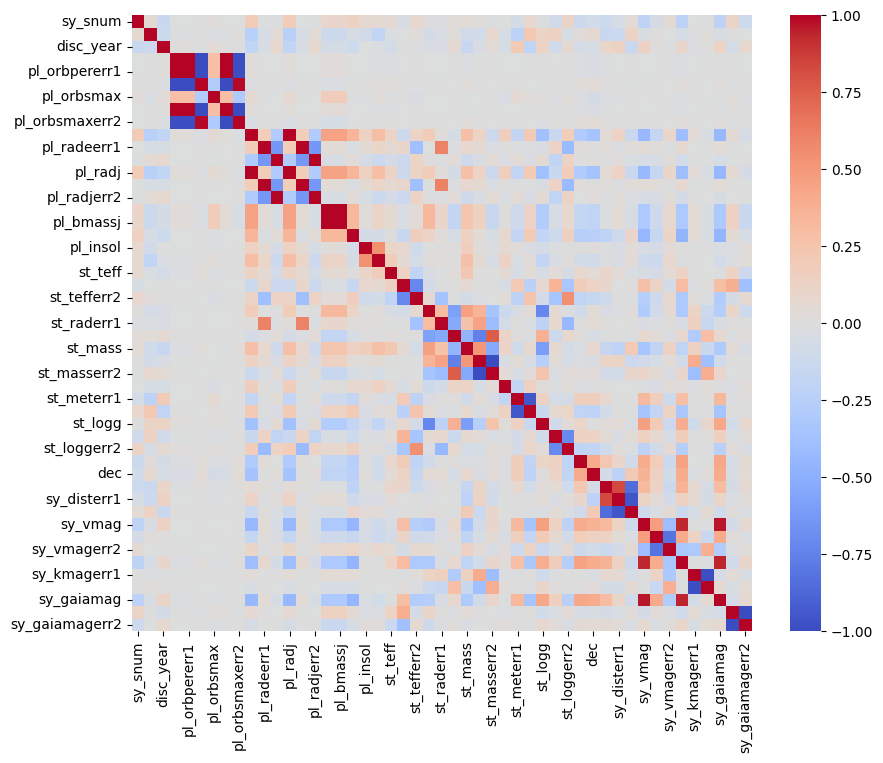

In [35]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize= (10,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',)
plt.show()

In [36]:
#Get highly correlated or negatively correlated columns
threshold = 0.95

high_corr = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

high_corr_columns_stack = high_corr.stack()
high_corr_columns_index = high_corr_columns_stack.index.to_list()
high_corr_columns_values = high_corr_columns_stack.values

high_corr_columns = list(zip(high_corr_columns_index,high_corr_columns_values))

high_corr_columns
high_corr_columns = [(col1,col2,val) for ((col1,col2),val) in high_corr_columns if col1 != col2]
high_corr_columns


[('pl_orbper', 'pl_orbpererr1', 0.9997296945395726),
 ('pl_orbper', 'pl_orbpererr2', -0.999381938422119),
 ('pl_orbper', 'pl_orbsmaxerr1', 0.9978301895824252),
 ('pl_orbper', 'pl_orbsmaxerr2', -0.9872662182500362),
 ('pl_orbpererr1', 'pl_orbper', 0.9997296945395726),
 ('pl_orbpererr1', 'pl_orbpererr2', -0.998996780703272),
 ('pl_orbpererr1', 'pl_orbsmaxerr1', 0.9979462544967804),
 ('pl_orbpererr1', 'pl_orbsmaxerr2', -0.9867613218374379),
 ('pl_orbpererr2', 'pl_orbper', -0.999381938422119),
 ('pl_orbpererr2', 'pl_orbpererr1', -0.998996780703272),
 ('pl_orbpererr2', 'pl_orbsmaxerr1', -0.9975278442572488),
 ('pl_orbpererr2', 'pl_orbsmaxerr2', 0.9885499241809688),
 ('pl_orbsmaxerr1', 'pl_orbper', 0.9978301895824252),
 ('pl_orbsmaxerr1', 'pl_orbpererr1', 0.9979462544967804),
 ('pl_orbsmaxerr1', 'pl_orbpererr2', -0.9975278442572488),
 ('pl_orbsmaxerr1', 'pl_orbsmaxerr2', -0.99473599763427),
 ('pl_orbsmaxerr2', 'pl_orbper', -0.9872662182500362),
 ('pl_orbsmaxerr2', 'pl_orbpererr1', -0.9867613

The above columns are some examples of highly correlated features which may be omitted to **avoid multicolinearity**.\
Our focus is a more cleaner and less redundant EDA

In [37]:
#highly correlated columns to remove

columns_to_remove = [
    'pl_orbpererr1', 'pl_orbpererr2',
    'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
    'pl_radeerr1', 'pl_radeerr2',
    'pl_radjerr1', 'pl_radjerr2',
    'st_masserr1', 'st_masserr2',
    'sy_disterr1', 'sy_disterr2',
    'sy_vmagerr1', 'sy_vmagerr2',
    'sy_kmagerr1', 'sy_kmagerr2',
    'sy_gaiamagerr1', 'sy_gaiamagerr2',
    'pl_bmasse', 'pl_bmassj',
    'sy_vmag', 'sy_gaiamag',
]

In [38]:
df = df.drop(columns=columns_to_remove)

We can also drop error related and redundant columns

In [39]:
err_related_cols = ['st_tefferr1', 'st_tefferr2']

df = df.drop(columns=err_related_cols)

In [40]:
#Add a 'years_since_discovery' column

DATASET_YEAR = 2025
df['years_since_discovery'] = (DATASET_YEAR - df['disc_year']).astype("int64")

Add a **luminosity** column in our dataset:

<h3>L = 4πσR<sup>2</sup>T<sup>4</sup></h3>

Where:\
𝐿 is the luminosity,\
𝑅 is the radius of the star,\
𝑇 is the effective temperature (in Kelvin),\
𝜎 is the Stefan-Boltzmann constant.

Luminosity helps quantify how much energy the star is emitting, crucial for understanding its life cycle, stability and behaviour.

The luminosity of a star is critical for determining the <u>habitable zone</u> around the start as well as the climate of the exoplanets around it.


In [41]:
STEFAN_BOLTZMANN_CONSTANT = 5.67e-8

df['luminosity'] = 4*np.pi*STEFAN_BOLTZMANN_CONSTANT*(df['st_teff']**4)*(df['st_rad']**2)
df['luminosity']

0       7.613282e+10
1       1.992048e+11
2       5.426024e+10
3       5.003491e+08
4       9.945376e+08
            ...     
5829    2.491460e+09
5830    2.491460e+09
5831    2.491460e+09
5832    4.905958e+10
5833    4.615225e+10
Name: luminosity, Length: 5834, dtype: float64